torch.Size([3, 685, 1000])


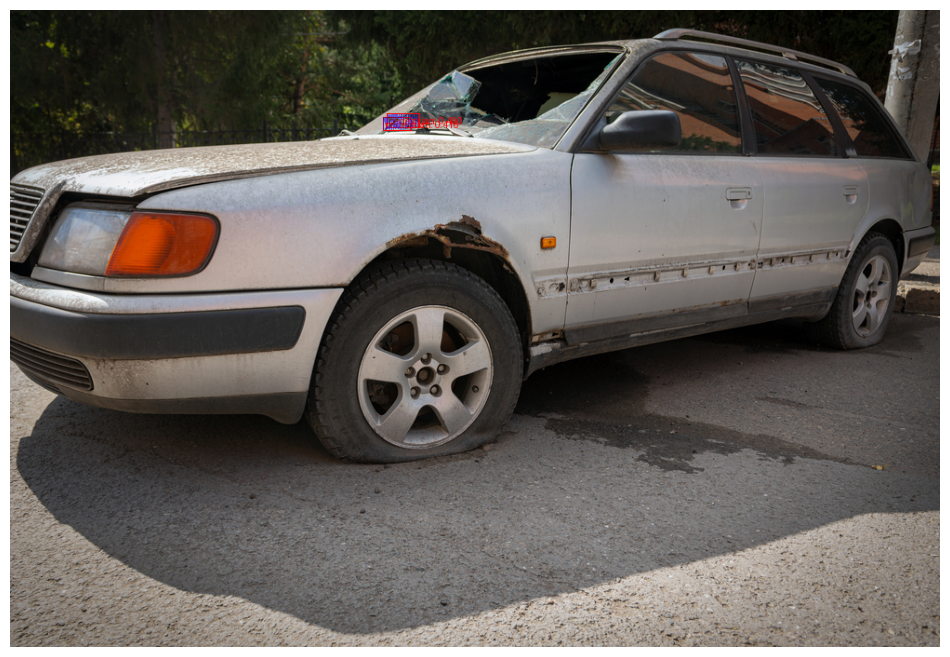

In [1]:
import matplotlib.pyplot as plt
import utils
from torchvision.utils import draw_bounding_boxes, draw_segmentation_masks
from torchvision.io import read_image
import torch

image = read_image("/Users/dragos/Licenta/CarDD_release/CarDD_COCO/val2017/000013.jpg")
eval_transform = utils.get_transform(train=False)
num_classes = 6
model = utils.get_model_instance_segmentation(num_classes)
model = torch.load("/Users/dragos/Licenta/Results/Inference/maskrcnn.pth", weights_only=False)
device = torch.device('mps')
model.to(device)
model.eval()
with torch.no_grad():
    x = eval_transform(image)
    print(x.shape)
    # convert RGBA -> RGB and move to device
    x = x[:3, ...].to(device)
    # x.to(device)
    predictions = model([x, ])
    pred = predictions[0]


score_threshold = 0.4

# Convert image to uint8 format
image = (255.0 * (image - image.min()) / (image.max() - image.min())).to(torch.uint8)
image = image[:3, ...]  # Keep only the first 3 channels (RGB)

# Filter predictions based on score > 0.4
high_confidence_indices = pred["scores"] > score_threshold

filtered_boxes = pred["boxes"][high_confidence_indices].long()
filtered_scores = pred["scores"][high_confidence_indices]
filtered_labels = pred["labels"][high_confidence_indices]
filtered_masks = pred["masks"][high_confidence_indices] > 0.7  # Binarize masks

# Create labels with score
pred_labels = [f"pedestrian: {score:.3f}" for score in filtered_scores]

# Draw bounding boxes
output_image = draw_bounding_boxes(image, filtered_boxes, pred_labels, colors="red")

# Draw segmentation masks
output_image = draw_segmentation_masks(output_image, filtered_masks.squeeze(1), alpha=0.5, colors="blue")

# Display the result
plt.figure(figsize=(12, 12))
plt.imshow(output_image.permute(1, 2, 0))
plt.axis("off")
plt.show()


In [17]:
print(pred['labels'])


tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1], device='mps:0')
